In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **SUL DATASET**

Il dataset è una versione pre-processata del dataset **OASIS Alzheimer's Detection** (un dataset di immagini MRI del cervello di 461 pazienti) utilizzato per rilevare i segni precoci dell’Alzheimer.

Poiché le immagini MRI sono 3D, sono state divise lungo l'asse z (l'asse della profondità del cervello) in 175 fette e sono state selezionate le fette che vanno dalla 55 esima alla 124 esima al fine di ridurre il numero di immagini e concentrarsi sulle sezioni cerebrali rilevanti per l'analisi della demenza; Questo approccio ha generato immagini 2D per ogni paziente.

Lo stesso approccio è stato utilizzato per le versioni delle MRI con segmentazione delle aree cerebrali offerte da OASIS effettuate tramite FSL FAST.

****
****

Le immagini sono classificate in **quattro sottoclassi**, in base alla progressione della malattia:

*   Moderate dementia (affetto da demenza)

*   Very mild dementia (affetto da demenza molto lieve)
* Mild dementia (affetto da demenza lieve)
* Non-demented (non affetto da demenza)


*La classificazione dei pazienti è stata effettuata sulla base delle valutazioni CDR (Clinical Dementia Rating), un punteggio che valuta la severità della demenza.*



In [188]:
# Import

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import zipfile
import os
import matplotlib.patches as mpatches
import numpy as np
from PIL import Image
import math

In [189]:
# Estrazione dataset

zip_path = "/content/drive/My Drive/Alzheimer-detection-project/oasis 1.zip"
extract_folder = "/content/Alzheimer-detection-project"

os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("File estratti:", os.listdir(extract_folder))


File estratti: ['__MACOSX', 'oasis 1']


In [190]:
oasis1_path = os.path.join(extract_folder, "oasis 1")
categories = ['Moderate Dementia', 'Mild Dementia', 'Very Mild Dementia', 'Non Demented']
for category in categories:
    category_path = os.path.join(oasis1_path, category)
    mri_segmented_path=os.path.join(category_path, 'mri segmented')
    mri_path= os.path.join(category_path, 'mri scan')

In [191]:
# Rimozione files inutili
for dirpath, dirnames, filenames in os.walk(oasis1_path):
    for filename in filenames:
        if filename == ".DS_Store":
            file_path = os.path.join(dirpath, filename)
            os.remove(file_path)
            print(f"Rimosso: {file_path}")


Rimosso: /content/Alzheimer-detection-project/oasis 1/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri segmented/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri segmented/OAS1_0001MR1 seg/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri segmented/OAS1_0050MR1 seg/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri segmented/OAS1_0002MR1 seg/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri scan/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri scan/OAS1_0050MR1/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri scan/OAS1_0001MR1/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Non Demented/mri scan/OAS1_0002MR1/.DS_Store
Rimosso: /content/Alzheimer-detection-project/oasis 1/Moderat

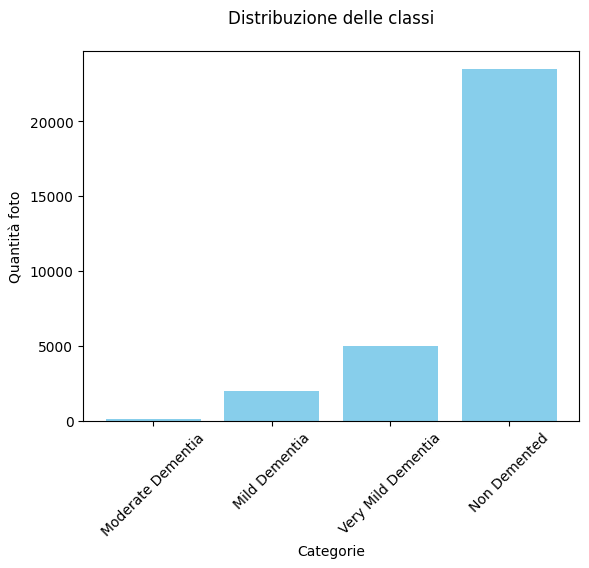

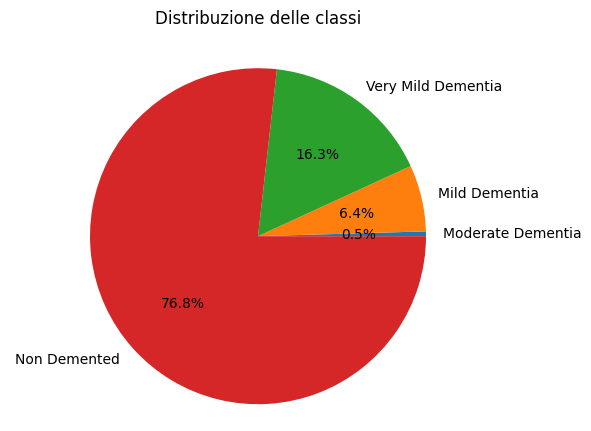

In [192]:
# Numero di immagini per categoria - grafico di distriibuzione delle classi

somma=0

for category in categories:
    category_path = os.path.join(oasis1_path, category)
    mri_segmented_path=os.path.join(category_path, 'mri segmented')
    for patient in os.listdir(mri_segmented_path):
      images= os.listdir(os.path.join(mri_segmented_path, patient))
      somma=somma+len(images)
    somma=0

valori=[]

for category in categories:
    category_path = os.path.join(oasis1_path, category)
    mri_path= os.path.join(category_path, 'mri scan')
    for patient in os.listdir(mri_path):
      images= os.listdir(os.path.join(mri_path, patient))
      somma=somma+len(images)
    valori.append(somma)
    somma=0

# Visualizzazione tramite istogramma
plt.bar(categories, valori, color='skyblue')
plt.title('Distribuzione delle classi', pad=20)
plt.xlabel('Categorie')
plt.xticks(rotation=45)
plt.ylabel('Quantità foto')
plt.show()
print(f" ")

# Visualizzazione tramite grafico a torta
plt.pie(valori, labels=categories, autopct='%1.1f%%', startangle=0)
plt.title('Distribuzione delle classi',pad=20)
plt.axis('equal')
plt.show()




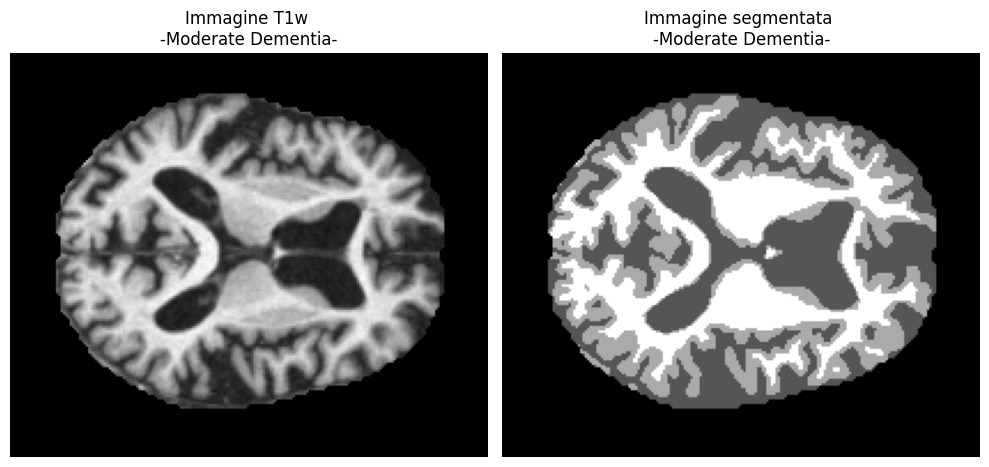

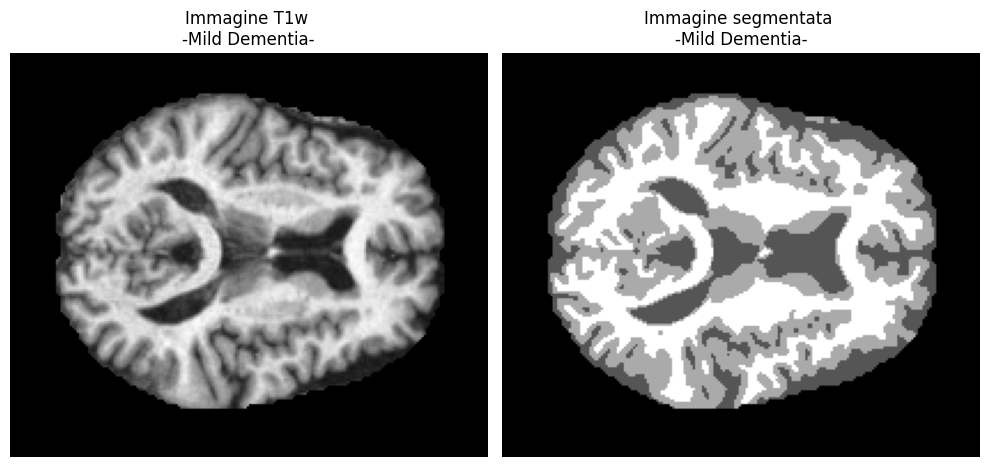

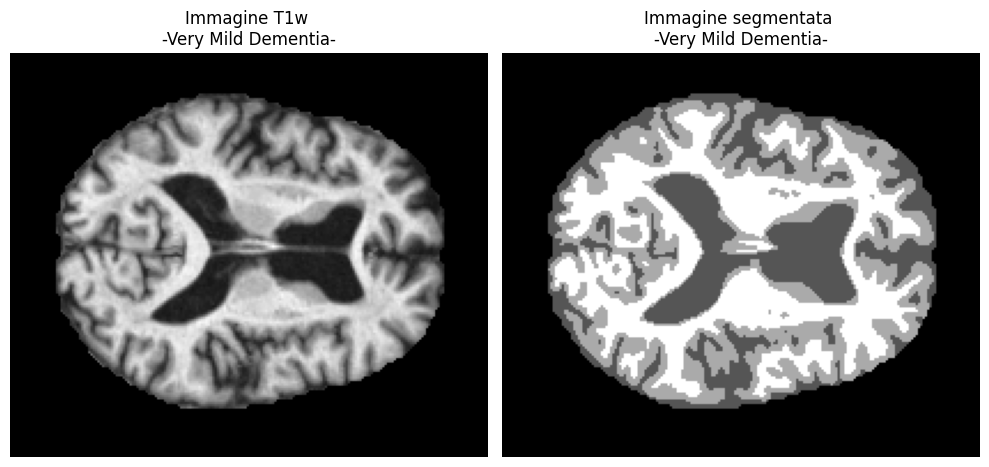

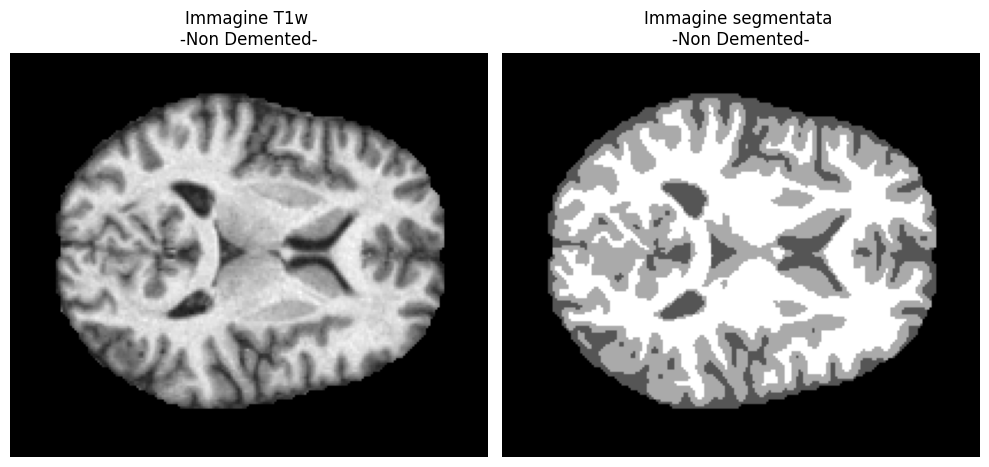

In [193]:
#VISUALIZZAZIONE DI IMMAGINI A CAMPIONE

# Scelta randomica della slice

#folders=os.listdir(mri_path)
#random_folder = random.choice(folders)
#patient_path= os.path.join(mri_path, random_folder)
#random_slice = random.choice(os.listdir(patient_path))

# Stampa di un immagine segmentata e un immagine T1w per categoria
for category in categories:
  category_path = os.path.join(oasis1_path, category)
  mri_segmented_path=os.path.join(category_path, 'mri segmented')
  mri_path= os.path.join(category_path, 'mri scan')
  folders=os.listdir(mri_path)
  random_folder = random.choice(folders)
  random_folder_seg= f"{random_folder.strip()} seg"

  patient_path= os.path.join(mri_path, random_folder)
  patient_path_seg= os.path.join(mri_segmented_path, random_folder_seg)

  img_path = os.path.join(patient_path, 'slice_85.png')
  img = mpimg.imread(img_path)
  img_seg_path = os.path.join(patient_path_seg, 'slice_85.png')
  img_seg = mpimg.imread(img_seg_path)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].imshow(img)
  axes[0].set_title(f"Immagine T1w \n-{category}-")
  axes[0].axis('off')

  axes[1].imshow(img_seg)
  axes[1].set_title(f"Immagine segmentata \n-{category}-")
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()




4 valori differenti: [0.         0.33333334 0.6666667  1.        ]




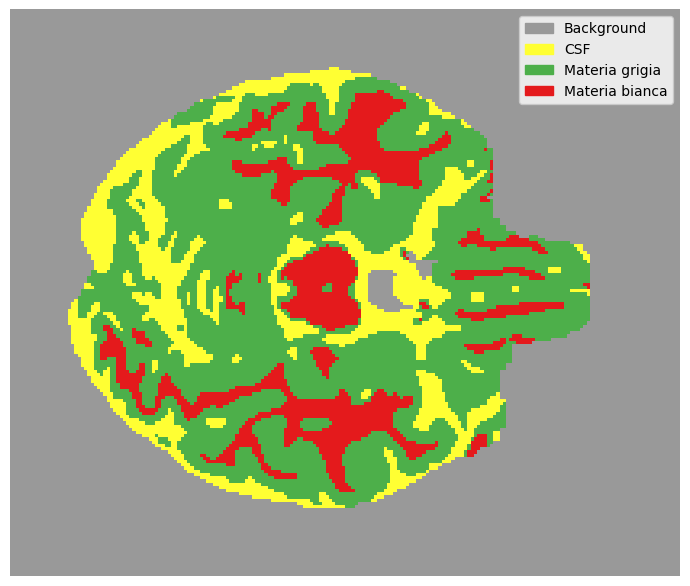

In [203]:
# Visualizzazione con etichette delle immagini segmentate

# Scelta di un immagine segmentata (parte commentata per randomizzazione)

#category='Very Mild Dementia'
#category_path = os.path.join(oasis1_path, category)
#mri_segmented_path = os.path.join(category_path, 'mri segmented')
#folders = os.listdir(mri_segmented_path)
#random_folder = random.choice(folders)
#patient_path = os.path.join(mri_segmented_path, random_folder)
#random_slice = random.choice(os.listdir(patient_path))
#img_seg_path = os.path.join(patient_path, random_slice)

img_seg = mpimg.imread(img_seg_path)
img_seg = img_seg[:, :, 0]

labels=['Background', 'CSF', 'Materia grigia', 'Materia bianca']
valori_unici = np.unique(img_seg)
print(f"{len(valori_unici)} valori differenti: {valori_unici}\n\n")

# creazione della leggenda e visualizzazione
cmap = plt.cm.Set1_r
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_seg, cmap=cmap)

patches = []
for i, val in enumerate(valori_unici):
  patch = mpatches.Patch(color=cmap(val), label=labels[i])
  patches.append(patch)
ax.legend(handles=patches, loc='upper right')

ax.axis('off')
plt.tight_layout()
plt.show()

I valori dell'output segmentato sono normalizzati e lo standard è:

| Valore         | Etichetta         |  
|----------------|-------------------|
| `0.0`          | **Background**     |
| `0.33333334`   | **CSF**            |
| `0.6666667`    | **Materia Grigia** |
| `1.0`          | **Materia Bianca** |

In [195]:
# Check dimensioni e canali

images_dimentions=set()
images_channels=set()

# Per ognni immagine in ogni categoria salva dimensioni e numero di canale negli insiemi
for category in categories:
    category_path = os.path.join(oasis1_path, category)
    mri_path= os.path.join(category_path, 'mri scan')
    for patient in os.listdir(mri_path):
      patient_path=os.path.join(mri_path, patient)
      file_path=os.path.join(patient_path, '.DS_Store')
      if os.path.isfile(file_path):
        os.remove(file_path)
      images= os.listdir(os.path.join(mri_path, patient))

      for image in images:
        image_path=os.path.join(patient_path, image)
        i = mpimg.imread(image_path)
        w, h = i.shape[:2]
        images_dimentions.add((w, h))

        if len(i.shape) == 3:
          channels = i.shape[2]
        else:
          channels = 1
        images_channels.add(channels)

# Controllo del numero di elementi negli insiemi
if len(images_dimentions) == 1:
  print("tutte le immagini hanno le stesse dimensioni", images_dimentions.pop())
else:
  print("NON tutte le immagini hanno le stesse dimensioni:")
  for dim in images_dimentions:
        print(" ", dim)

if len(images_channels) == 1:
    print("tutte le immagini hanno lo stesso numero di canali:", images_channels.pop())
else:
    print("NON tutte le immagini hanno lo stesso numero di canali:")
    for ch in images_channels:
        print(" ", ch)



tutte le immagini hanno le stesse dimensioni (176, 208)
tutte le immagini hanno lo stesso numero di canali: 4


In [196]:
# Conversione delle immagini MRI in scale di grigi
# Utilizzo Grayscale = 0.299 * R + 0.587 * G + 0.114 * B

for category in categories:
    category_path = os.path.join(oasis1_path, category)
    mri_path= os.path.join(category_path, 'mri scan')
    for patient in os.listdir(mri_path):
        patient_path = os.path.join(mri_path, patient)
        file_path = os.path.join(patient_path, '.DS_Store')
        if os.path.isfile(file_path):
            os.remove(file_path)
        images = os.listdir(os.path.join(mri_path, patient))

        for image in images:
            image_path = os.path.join(patient_path, image)
            i = mpimg.imread(image_path)

            if len(i.shape) == 3 and i.shape[2] >= 3:
                i_rgb = i[..., :3]

                i_gray = 0.299 * i_rgb[..., 0] + 0.587 * i_rgb[..., 1] + 0.114 * i_rgb[..., 2]
                i_gray = (i_gray * 255).astype(np.uint8)
                gray_img = Image.fromarray(i_gray)
                gray_img.save(image_path)

# Check del nuovo numero di canali
images_channels=set()
for category in categories:
    category_path = os.path.join(oasis1_path, category)
    mri_path= os.path.join(category_path, 'mri scan')
    for patient in os.listdir(mri_path):
      patient_path=os.path.join(mri_path, patient)
      images= os.listdir(os.path.join(mri_path, patient))

      for image in images:
        image_path=os.path.join(patient_path, image)
        i = mpimg.imread(image_path)

        if len(i.shape) == 3:
          channels = i.shape[2]
        else:
          channels = 1
        images_channels.add(channels)

if len(images_channels) == 1:
    print("tutte le immagini hanno lo stesso numero di canali:", images_channels.pop())
else:
    print("NON tutte le immagini hanno lo stesso numero di canali:")
    for ch in images_channels:
        print(" ", ch)

tutte le immagini hanno lo stesso numero di canali: 1


In [197]:
# Calcolo della deviazione standard e mse

std_interclasse= {}
mse_interclasse={}
std_intraclasse={}
mse_intraclasse={}


selected_slices = ['slice_60.png', 'slice_85.png', 'slice_103.png', 'slice_120.png']  # Esempio: nomi delle slice

for name in selected_slices:  #for name in images per prendere tutte le immagini
  slices_all_categories = []
  for category in categories:
    slices = []
    category_path = os.path.join(oasis1_path, category)
    mri_path= os.path.join(category_path, 'mri scan')
    for patient in os.listdir(mri_path):
      patient_path=os.path.join(mri_path, patient)
      slice_of_interest= os.path.join(patient_path, name)
      i = Image.open(slice_of_interest)
      i_array = np.array(i)
      slices.append(i_array)

    if slices:
        slices_stack_interclasse = np.stack(slices)
        std_map_interclasse = np.std(slices_stack_interclasse, axis=0)
        mean_slice_interclasse = np.mean(slices_stack_interclasse, axis=0)
        mse_map_interclasse = np.mean((slices_stack_interclasse - mean_slice_interclasse) ** 2, axis=0)
        mse_interclasse[(name,category)] = mse_map_interclasse
        std_interclasse[(name, category)] = std_map_interclasse

        slices_all_categories.extend(slices)

  if slices_all_categories:
        slices_stack_intraclasse = np.stack(slices_all_categories)
        std_map_intraclasse = np.std(slices_stack_intraclasse, axis=0)
        mean_slice_intraclasse = np.mean(slices_stack_intraclasse, axis=0)
        mse_map_intraclasse = np.mean((slices_stack_intraclasse - mean_slice_intraclasse) ** 2, axis=0)
        std_intraclasse[name] = std_map_intraclasse
        mse_intraclasse[name] = mse_map_intraclasse





### **DEVIAZIONE STANDARD --> misura dove variano di più i pixel**

- STD ALTA: molta variabilità nei valori dei pixel

- STD BASSA: poca variabilità nei valori dei pixel

### **MEAN SQUARE ERROR --> misura quanto ogni pixel si allontana dalla media**

- MSE ALTO: alta variabilità intra-classe

- MSE BASSO: bassa variabilità intra-classe

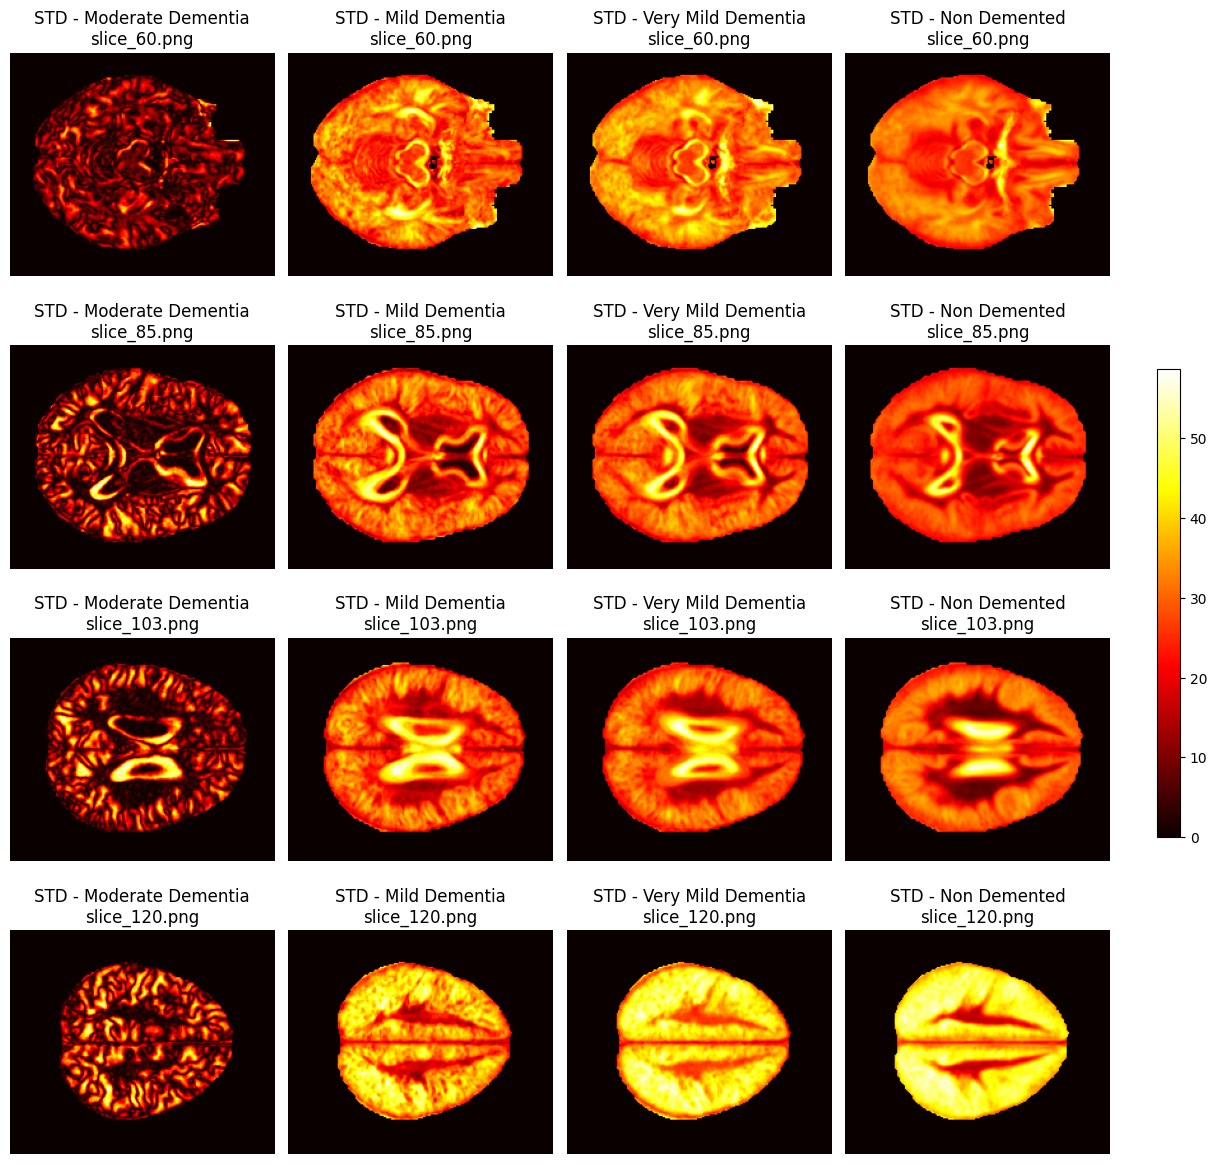

In [198]:
#  Visualizzazione della deviazione standard (sulla stessa slice) intra classe

columns = 4
imgs = len(std_interclasse)
rows = math.ceil(imgs / columns)
plt.figure(figsize=(columns * 3, rows * 3))

for idx, ((name, category), std_map_interclasse) in enumerate((std_interclasse.items())):
    plt.subplot(rows, columns, idx + 1)
    im = plt.imshow(std_map_interclasse, cmap='hot')
    plt.title(f"STD - {category}\n{name}")
    plt.axis('off')

plt.tight_layout()
plt.colorbar(im, ax=plt.gcf().get_axes(), fraction=0.02, pad=0.04)
plt.show()

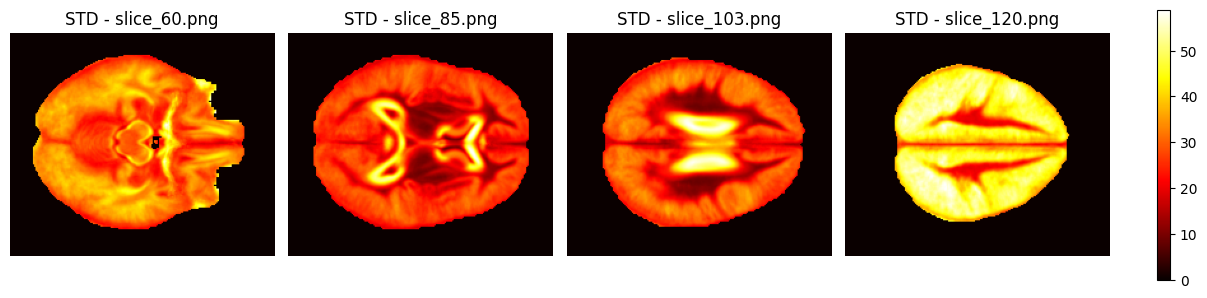

In [199]:
# Visualizzazione della deviazione standard (sulla stessa slice) inter classe

columns = 4
imgs = len(std_intraclasse)
rows = math.ceil(imgs / columns)
plt.figure(figsize=(columns * 3, rows * 3))

for idx, (name, std_map_intraclasse) in enumerate(std_intraclasse.items()):
    plt.subplot(rows, columns, idx + 1)
    im = plt.imshow(std_map_intraclasse, cmap='hot')
    plt.title(f"STD - {name}")
    plt.axis('off')

plt.tight_layout()
plt.colorbar(im, ax=plt.gcf().get_axes(), fraction=0.02, pad=0.04)
plt.show()

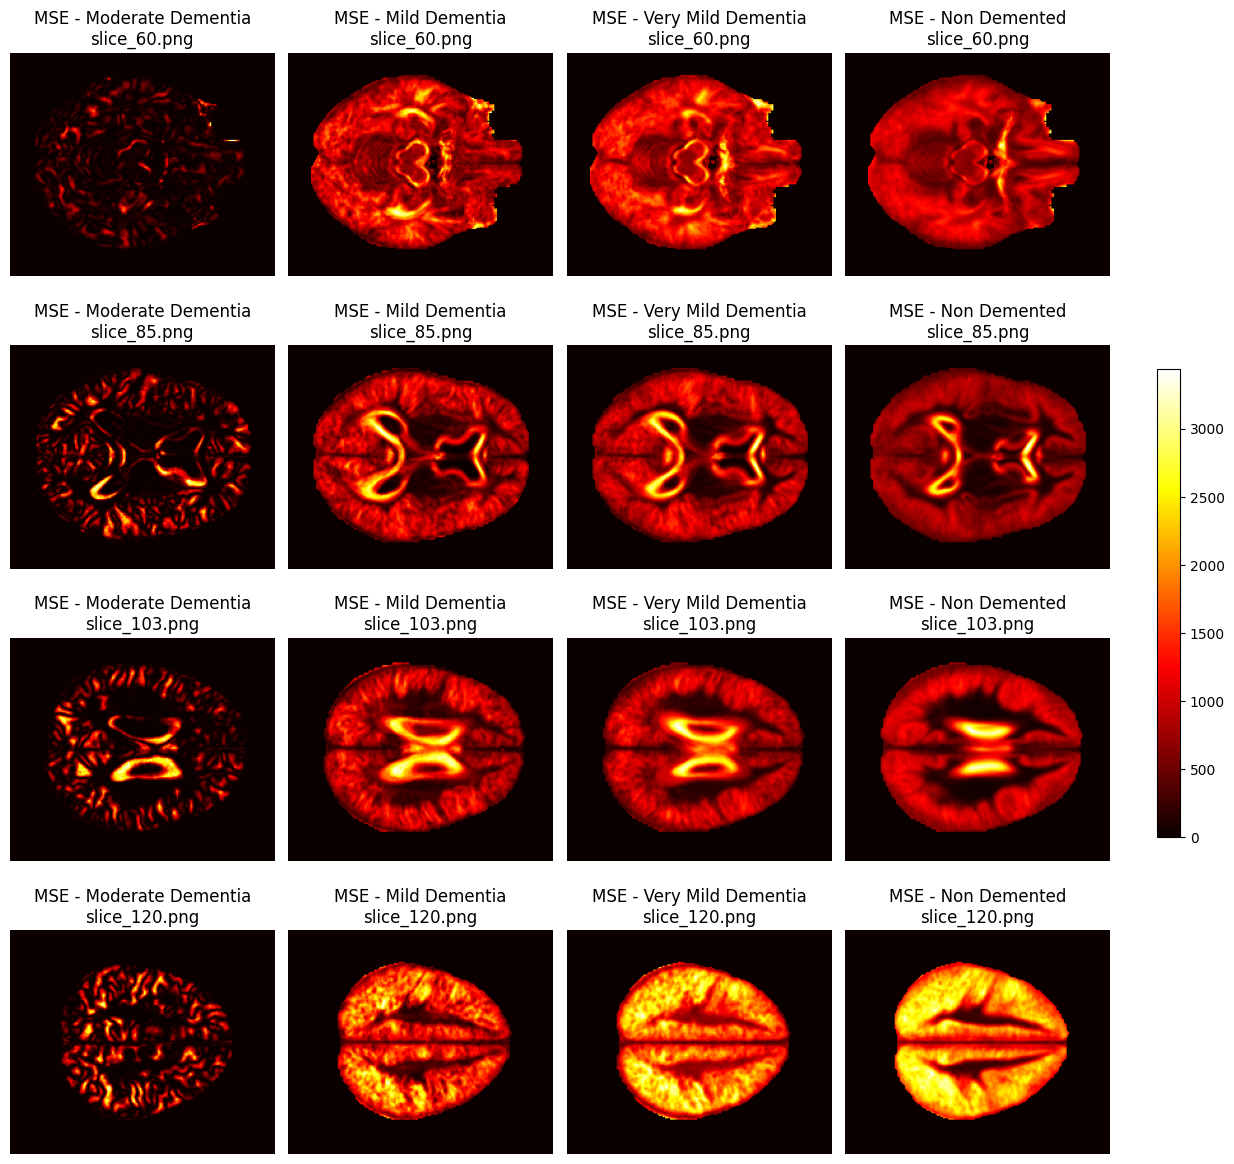

In [200]:
# Visualizzazione dell'MSE (sulla stessa slice) intra classe

columns = 4
imgs = len(mse_interclasse)
rows = math.ceil(imgs / columns)
plt.figure(figsize=(columns * 3, rows * 3))

for idx, ((name, category), mse_map_interclasse) in enumerate(mse_interclasse.items()):
    plt.subplot(rows, columns, idx + 1)
    im = plt.imshow(mse_map_interclasse, cmap='hot')
    plt.title(f"MSE - {category}\n{name}")
    plt.axis('off')

plt.tight_layout()
plt.colorbar(im, ax=plt.gcf().get_axes(), fraction=0.02, pad=0.04)
plt.show()

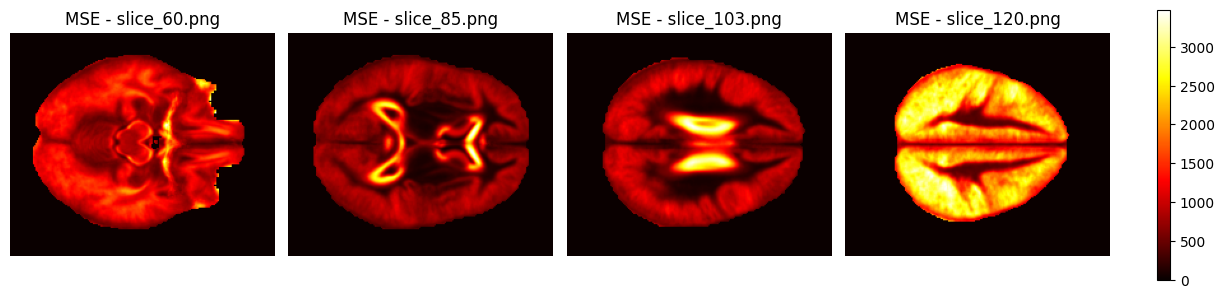

In [201]:
# Visualizzazione dell'MSE (sulla stessa slice) inter classe

columns = 4
imgs = len(mse_intraclasse)
rows = math.ceil(imgs / columns)
plt.figure(figsize=(columns * 3, rows * 3))

for idx, (name, mse_map_intraclasse) in enumerate(mse_intraclasse.items()):
    plt.subplot(rows, columns, idx + 1)
    im = plt.imshow(mse_map_intraclasse, cmap='hot')
    plt.title(f"MSE - {name}")
    plt.axis('off')

plt.tight_layout()
plt.colorbar(im, ax=plt.gcf().get_axes(), fraction=0.02, pad=0.04)
plt.show()

In [ ]:
# divisione in test, training e validation set